# Implementing a MACD Crossover Trading Strategy in Python

## Introduction

In this tutorial, we'll dive into creating an algorithmic trading strategy using one of the most popular technical indicators among traders: the Moving Average Convergence Divergence (MACD). 

This strategy helps identify potential buy and sell opportunities based on the momentum and trend changes in stock prices. We'll implement this strategy step-by-step, aiming to give you both the theoretical background and practical coding skills to explore algorithmic trading.

## Process

What is the step by step process of coding a quantitative strategy?

1. Importing Libraries and Data
2. Calculating Daily returns
3. Generating your strategy signal
4. Generating buy and sell signals (today we will be doing a long-short strategy)
5. Calculating Strategy Returns
6. Evaluating the strategy

## What is MACD?
The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. It consists of three main components:

Moving average convergence/divergence (MACD) is a technical indicator to help investors identify market entry points for buying or selling.

The MACD line is calculated by 
1. Calculating the 26-period exponential moving average
2. Calculating the 12-period exponential moving average
3. Subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
4. The signal line is a nine-period EMA of the MACD line.

MACD is best used with daily periods, where the traditional settings of 26/12/9 days is the **default**.

## Prerequisites

Before we begin, ensure you have the following installed in your Python environment:

- numpy for numerical computations.
- pandas for data manipulation.
- yfinance for downloading historical market data.

matplotlib (optional) for visualizing the data and indicators.

You can install these packages using pip:

`pip install numpy pandas yfinance matplotlib`

In [1]:
pip install numpy pandas yfinance matplotlib

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qs

## Importing Financial Data

In [4]:
ticker = 'AAPL'

In [3]:
# Download historical data for Apple Inc.
def import_data(ticker = 'AAPL' , start = '2020-01-01' , end = '2024-01-01'):
    data = yf.download(ticker , start = start , end = end)

    return data

In [6]:
df = import_data()

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


## Calculate the Daily Returns

Over here, I will use log returns

In [11]:
def calc_daily_returns(data):
    data['daily_r'] = np.log(data['Close'] / data['Close'].shift(1))

    data.dropna(inplace = True) # This drops all the null values

    return data

In [10]:
# Why do we use this? 
# We want a benchmark for our strategy

In [12]:
df = calc_daily_returns(df)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,daily_r
Date,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,-0.009770
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.007937
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004714
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.015958
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.316757,170108400,0.021018
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.005563
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.002845
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.000518


## Calculate the MACD and Signal Line

In [14]:
def compute_signals(data , ema1 = 12 , ema2 = 26 , ema3 = 9):
    data['ema1'] = data['Close'].ewm(span = ema1 , adjust = False).mean()
    data['ema2'] = data['Close'].ewm(span = ema2 , adjust = False).mean()

    data['MACD'] = data['ema2'] - data['ema1']

    data['Signal'] = data['MACD'].ewm(span = ema3 , adjust = False).mean()

    data.dropna(inplace = True)

    return data

In [15]:
df = compute_signals(df)

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_r,ema1,ema2,MACD,Signal
Date,,,,,,,,,,,
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,-0.009770,74.357498,74.357498,0.000000,0.000000
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.007937,74.448652,74.401387,-0.047265,-0.009453
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004714,74.471552,74.415914,-0.055638,-0.018690
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.015958,74.675544,74.518254,-0.157290,-0.046410
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.316757,170108400,0.021018,75.095845,74.732272,-0.363573,-0.109843


<AxesSubplot: xlabel='Date'>

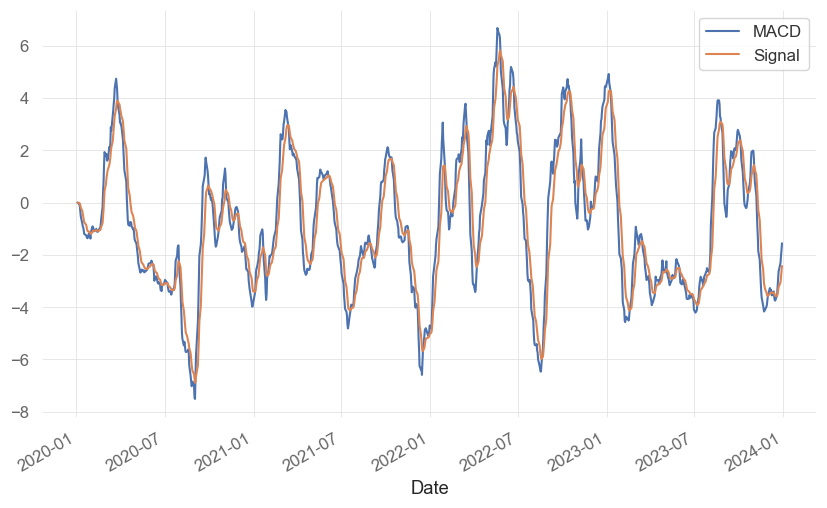

In [18]:
df[['MACD' , 'Signal']].plot()

## Define Buy and Sell Signals

In [22]:
def compute_signals(data):
    data['position'] = np.where(data['MACD'] > data['Signal'] , 1 , -1)

    data['position'] = data['position'].shift(1)

    data.dropna(inplace = True)
    return data

In [23]:
df = compute_signals(df)

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_r,ema1,ema2,MACD,Signal,position
Date,,,,,,,,,,,,
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.007937,74.448652,74.401387,-0.047265,-0.009453,-1.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004714,74.471552,74.415914,-0.055638,-0.018690,-1.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.015958,74.675544,74.518254,-0.157290,-0.046410,-1.0
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.316757,170108400,0.021018,75.095845,74.732272,-0.363573,-0.109843,-1.0
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.487030,140644800,0.002258,75.478407,74.943400,-0.535007,-0.194876,-1.0


# Calculate Strategy Returns

In [25]:
def calc_returns(data):
    # Buy and Hold returns are the daily returns
    
    data['strategy_r'] = data['daily_r'] * data['position']
    
    data.dropna(inplace = True)
    
    return data

In [26]:
df = calc_returns(df)

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,daily_r,ema1,ema2,MACD,Signal,position,strategy_r
Date,,,,,,,,,,,,,
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.007937,74.448652,74.401387,-0.047265,-0.009453,-1.0,-0.007937
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004714,74.471552,74.415914,-0.055638,-0.018690,-1.0,0.004714
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200,0.015958,74.675544,74.518254,-0.157290,-0.046410,-1.0,-0.015958
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.316757,170108400,0.021018,75.095845,74.732272,-0.363573,-0.109843,-1.0,-0.021018
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.487030,140644800,0.002258,75.478407,74.943400,-0.535007,-0.194876,-1.0,-0.002258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.005563,194.738889,192.102573,-2.636317,-3.236689,1.0,-0.005563
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.002845,194.479061,192.172753,-2.306308,-3.050613,1.0,-0.002845
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.000518,194.274589,192.245141,-2.029448,-2.846380,1.0,0.000518


# Evaluating Strategy

In [28]:
def assessment(data):
    qs.reports.full(data['strategy_r'])

                           Strategy
-------------------------  ----------
Start Period               2020-01-06
End Period                 2023-12-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -68.13%
CAGR﹪                     -17.99%

Sharpe                     -0.69
Prob. Sharpe Ratio         8.55%
Smart Sharpe               -0.6
Sortino                    -0.94
Smart Sortino              -0.82
Sortino/√2                 -0.67
Smart Sortino/√2           -0.58
Omega                      0.88

Max Drawdown               -74.03%
Longest DD Days            1409
Volatility (ann.)          33.57%
Calmar                     -0.24
Skew                       -0.03
Kurtosis                   4.95

Expected Daily %           -0.11%
Expected Monthly %         -2.35%
Expected Yearly %          -24.87%
Kelly Criterion            -6.37%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.57%
Expected Shortfall (cVaR)  -3.57%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2023-02-15,2023-12-29,1409,-74.025858,-73.392401
2,2020-01-08,2020-01-29,2020-02-05,29,-8.177128,-8.043971
3,2020-02-11,2020-02-11,2020-02-11,1,-0.605156,NaN
4,2020-02-14,2020-02-14,2020-02-14,1,-0.024627,NaN


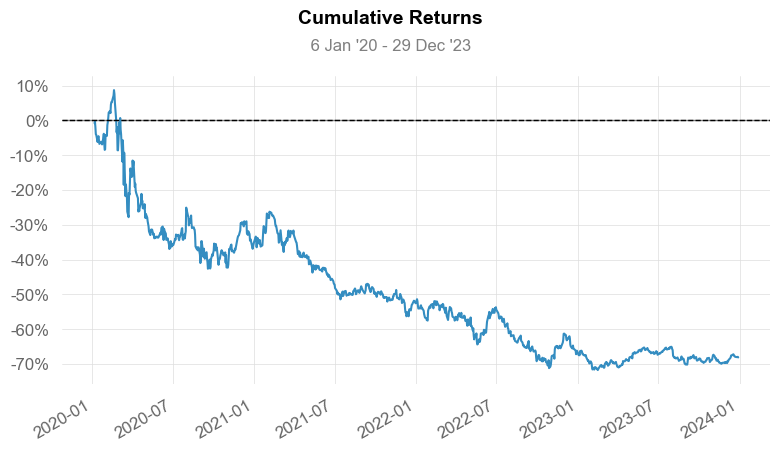

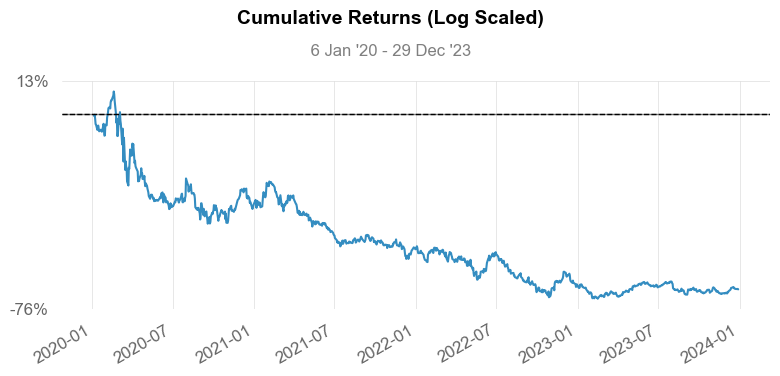

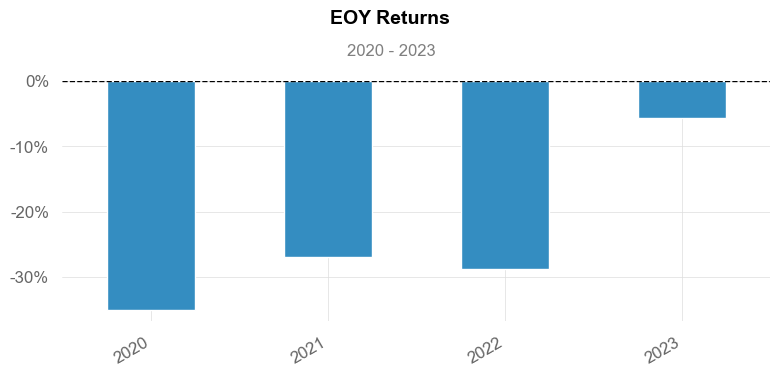

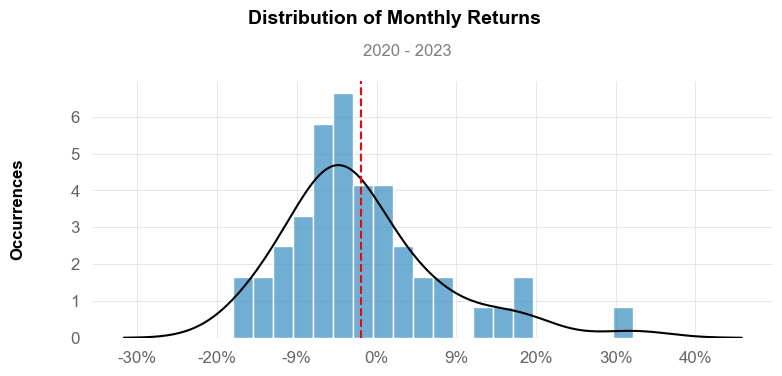

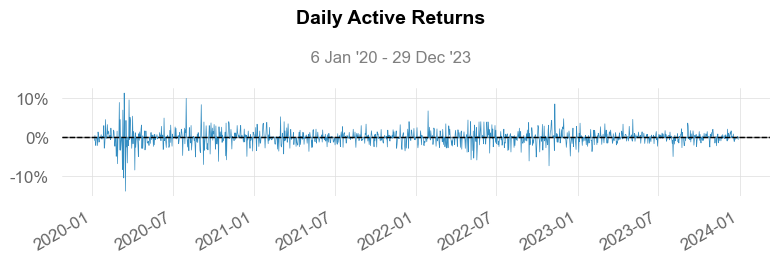

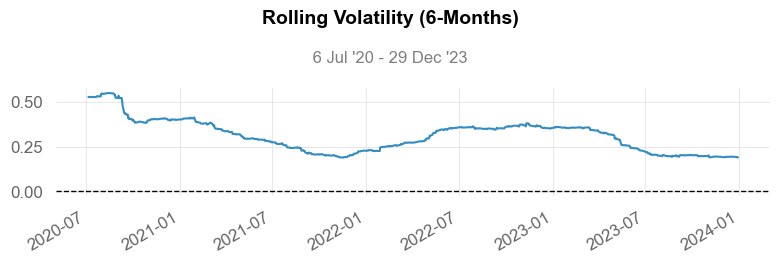

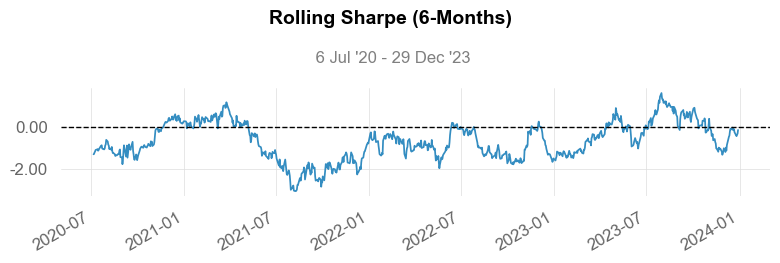

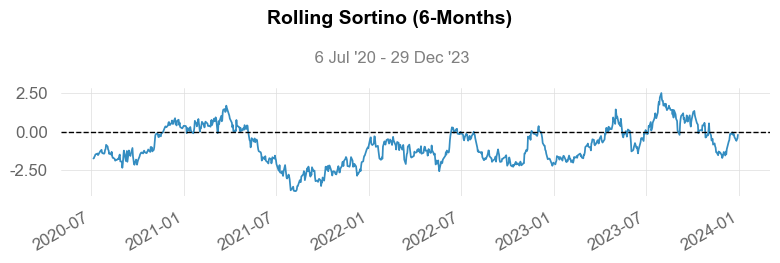

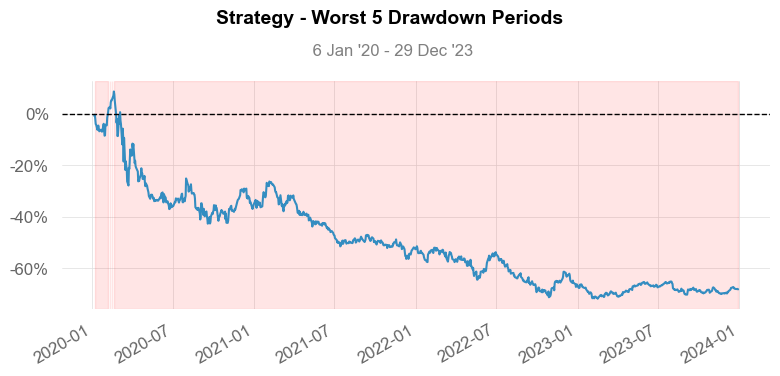

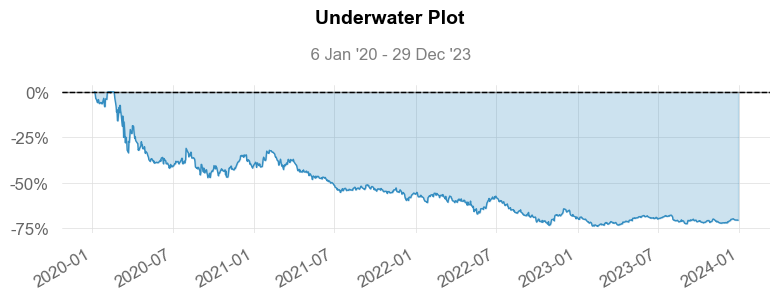

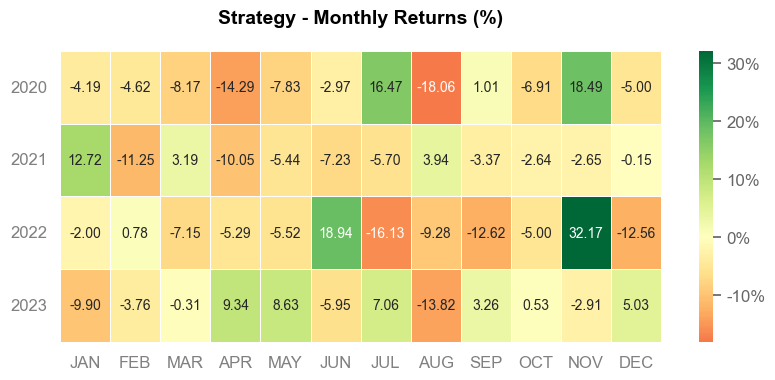

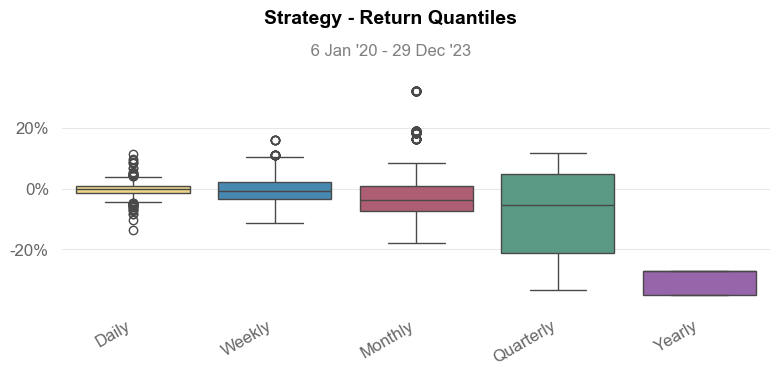

In [29]:
df = assessment(df)

# Object Oriented Approach

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qs

In [30]:
class MACD():
    def __init__(self , ticker = 'AAPL' , start = '2020-01-01' , end = '2024-01-01'):
        self.ticker = ticker
        self.start = start
        self.end = end
        
        self.import_data()
        self.daily_returns()
        
    def import_data(self):
        self.df = yf.download(ticker, start = self.start, end = self.end)
    
    def daily_returns(self):
        self.df['daily_r'] = np.log(self.df['Close'] / self.df['Close'].shift(1))
    
        self.df.dropna(inplace = True)
        
    def generate_signal(self , ema1 = 12 , ema2 = 26, ema3 = 9):
        self.df['ema1'] = self.df['Close'].ewm(span = ema1, adjust=False).mean()
        self.df['ema2'] = self.df['Close'].ewm(span = ema2, adjust=False).mean()
    
        self.df['MACD'] = self.df['ema1'] - self.df['ema2']
    
        self.df['Signal'] = self.df['MACD'].ewm(span = ema3, adjust=False).mean()
    
        self.df.dropna(inplace = True)
        
    def generate_positions(self):
        
        self.df['position'] = np.where(self.df['MACD'] > self.df['Signal'] , 1 , -1)
    
        self.df['position'] = self.df['position'].shift(1)
        self.df.dropna(inplace = True)
        
        # self.plot_position()
    
    def plot_position(self):
        self.df[['Signal', 'MACD', 'position']].plot(figsize=(12, 8), grid=True, secondary_y='position')
        
    def evaluate_strategy(self):
        self.df['strategy_r'] = self.df['daily_r'] * self.df['position']
        self.df.dropna(inplace = True)

        # Calculate and print specific metrics
        sharpe_ratio = qs.stats.sharpe(self.df['strategy_r'])
        max_drawdown = qs.stats.max_drawdown(self.df['strategy_r'])
        win_rate = qs.stats.win_rate(self.df['strategy_r'])

        print(f"Sharpe Ratio: {sharpe_ratio}")
        print(f"Max Drawdown: {max_drawdown}")
        print(f"Win Rate: {win_rate}")
        
        return sharpe_ratio , max_drawdown , win_rate

# Optimizing Parameters

In [31]:
ema1 = [10 , 11 , 12 , 13 , 14]
ema2 = [24 , 25 , 26 , 27 , 28]
ema3 = [8 , 9 , 10]

# Initialize a list to store results
results = []

for e1 in ema1:
    for e2 in ema2:
        for e3 in ema3:
            strategy = MACD('AAPL')
            strategy.generate_signal(ema1 = e1 , ema2 = e2 , ema3 = e3)
            strategy.generate_positions()
            
            # Generate a summary report instead of a full report
            # summary = qs.stats.summary(self.df['strategy_r'], self.df['daily_r'])
            
            print('-' * 50)
            print(f"Evaluating Strategy for e1: {e1} , e2: {e2} , e3: {e3}")
            sharpe_ratio, max_drawdown, win_rate = strategy.evaluate_strategy()
            
            results.append(((e1, e2, e3), sharpe_ratio, max_drawdown , win_rate))

[*********************100%%**********************]  1 of 1 completed
--------------------------------------------------
Evaluating Strategy for e1: 10 , e2: 24 , e3: 8
Sharpe Ratio: 0.6608644349892324
Max Drawdown: -0.2606906439061223
Win Rate: 0.5034965034965035
[*********************100%%**********************]  1 of 1 completed
--------------------------------------------------
Evaluating Strategy for e1: 10 , e2: 24 , e3: 9
Sharpe Ratio: 0.6462813074564825
Max Drawdown: -0.2439201019376559
Win Rate: 0.5054945054945055
[*********************100%%**********************]  1 of 1 completed
--------------------------------------------------
Evaluating Strategy for e1: 10 , e2: 24 , e3: 10
Sharpe Ratio: 0.7263188745434097
Max Drawdown: -0.26418461911893143
Win Rate: 0.5084915084915085
[*********************100%%**********************]  1 of 1 completed
--------------------------------------------------
Evaluating Strategy for e1: 10 , e2: 25 , e3: 8
Sharpe Ratio: 0.6703128857540419
Max D

In [32]:
# After evaluating all strategies, find the one with the highest Sharpe ratio (as an example)
best_strategy = max(results, key=lambda x: x[1])

print(f"Best Strategy: EMA1={best_strategy[0][0]}, EMA2={best_strategy[0][1]}, EMA3={best_strategy[0][2]}")
print(f"Sharpe Ratio: {best_strategy[1]}, Max Drawdown: {best_strategy[2]} , Win Rate: {best_strategy[3]}")

Best Strategy: EMA1=13, EMA2=28, EMA3=8
Sharpe Ratio: 0.8267521265847729, Max Drawdown: -0.2694733142231056 , Win Rate: 0.5164835164835165


# References

https://www.investopedia.com/terms/m/macd.asp#:~:text=Key%20Takeaways-,Moving%20average%20convergence%2Fdivergence%20(MACD)%20is%20a%20technical%20indicator,EMA%20of%20the%20MACD%20line.